# –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–∞–±–ª–∏—Ü—ã

In [1]:
import pandas as pd
import re


In [2]:
netflix_df=pd.read_csv('/content/drive/MyDrive/–∫—É—Ä—Å python analitic/Portfolio Lesson/netflix_users_data.csv')
netflix_df

User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

             Country  Age  Gender      Device Plan Duration  
0      United States   28    Male  Smartphone       1 Month  
1             Canada   35  Female      Tablet       1 Month  
2     United Kingdom   42    Male    Smart TV       1 Month  
3          Australia   51  Female      Laptop       1 Month  
4            Germany   33    Male  Smartphone       1 Month  
...              ...  ...     ...         ...           ...  
2495           Spain   28  Female    Smart TV       1 Month  
2496           Spain   33  Female    Smart TV       1 Month  
2497   United States   38    Male      Laptop       1 Month  
2498          Canada   48  Female      Tablet       1 Month  
2499   United States   35  Female    Smart TV       1 Month  

[2500 rows x 10 columns]

In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [4]:
netflix_df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [5]:
netflix_df.duplicated().sum()

np.int64(0)

In [6]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫–æ–ª–æ–Ω–æ–∫ –≤ camelCase –¥–ª—è netflix_df
netflix_df.columns = [
    'userId',
    'subscriptionType',
    'monthlyRevenue',
    'joinDate',
    'lastPaymentDate',
    'country',
    'age',
    'gender',
    'device',
    'planDuration'
]

In [7]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userId            2500 non-null   int64 
 1   subscriptionType  2500 non-null   object
 2   monthlyRevenue    2500 non-null   int64 
 3   joinDate          2500 non-null   object
 4   lastPaymentDate   2500 non-null   object
 5   country           2500 non-null   object
 6   age               2500 non-null   int64 
 7   gender            2500 non-null   object
 8   device            2500 non-null   object
 9   planDuration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [8]:
netflix_df['joinDate'] = pd.to_datetime(netflix_df['joinDate'])
netflix_df['lastPaymentDate'] = pd.to_datetime(netflix_df['lastPaymentDate'])
netflix_df

<ipython-input-8-6082fd53e046>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_df['joinDate'] = pd.to_datetime(netflix_df['joinDate'])
<ipython-input-8-6082fd53e046>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_df['lastPaymentDate'] = pd.to_datetime(netflix_df['lastPaymentDate'])


userId subscriptionType  monthlyRevenue   joinDate lastPaymentDate  \
0          1            Basic              10 2022-01-15      2023-10-06   
1          2          Premium              15 2021-05-09      2023-06-22   
2          3         Standard              12 2023-02-28      2023-06-27   
3          4         Standard              12 2022-10-07      2023-06-26   
4          5            Basic              10 2023-01-05      2023-06-28   
...      ...              ...             ...        ...             ...   
2495    2496          Premium              14 2022-07-25      2023-12-07   
2496    2497            Basic              15 2022-04-08      2023-07-14   
2497    2498         Standard              12 2022-09-08      2023-07-15   
2498    2499         Standard              13 2022-12-08      2023-12-07   
2499    2500            Basic              15 2022-08-13      2023-12-07   

             country  age  gender      device planDuration  
0      United States   28    Male  Smartphone      1 Month  
1             Canada   35  Female      Tablet      1 Month  
2     United Kingdom   42    Male    Smart TV      1 Month  
3          Australia   51  Female      Laptop      1 Month  
4            Germany   33    Male  Smartphone      1 Month  
...              ...  ...     ...         ...          ...  
2495           Spain   28  Female    Smart TV      1 Month  
2496           Spain   33  Female    Smart TV      1 Month  
2497   United States   38    Male      Laptop      1 Month  
2498          Canada   48  Female      Tablet      1 Month  
2499   United States   35  Female    Smart TV      1 Month  

[2500 rows x 10 columns]

# –ê–Ω–∞–ª–∏—Ç–∏–∫–∞

1. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –ø–µ—Ä–∏–æ–¥, —Å –∫–æ—Ç–æ—Ä–æ–≥–æ –ø–æ—è–≤–∏–ª–∏—Å—å —ç—Ç–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏

In [9]:
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
unique_users = netflix_df['userId'].nunique()

# –ü–µ—Ä–∏–æ–¥ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
start_date = netflix_df['joinDate'].min()
end_date = netflix_df['joinDate'].max()

print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏: {unique_users}")
print(f"–ü–µ—Ä–∏–æ–¥ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏: —Å {start_date.date()} –ø–æ {end_date.date()}")

–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏: 2500
–ü–µ—Ä–∏–æ–¥ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏: —Å 2021-05-09 –ø–æ 2023-12-01


2. –ò–∑—É—á–∏ –≤–æ–∑—Ä–∞—Å—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

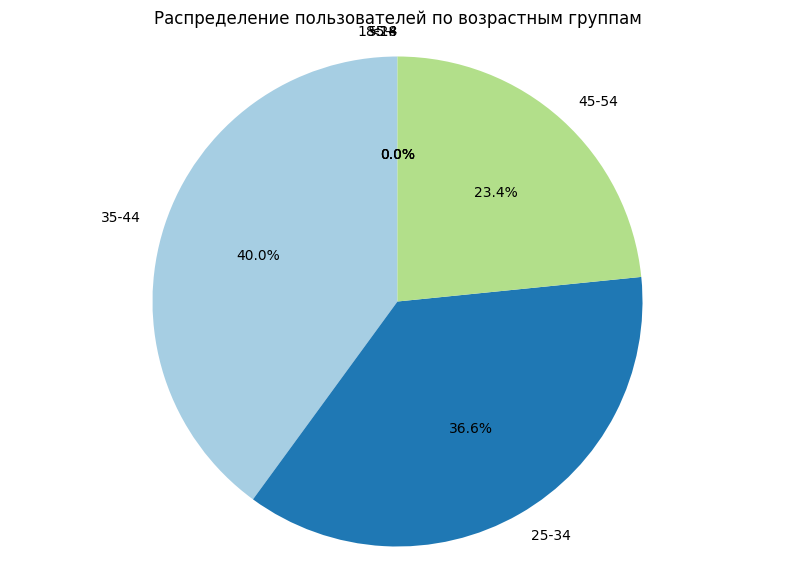

In [10]:
import matplotlib.pyplot as plt

# –°–æ–∑–¥–∞–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø
age_bins = [0, 18, 25, 35, 45, 55, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55+']
netflix_df['age_group'] = pd.cut(netflix_df['age'], bins=age_bins, labels=age_labels)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫—Ä—É–≥–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã
plt.figure(figsize=(10, 7))
age_counts = netflix_df['age_group'].value_counts()
plt.pie(age_counts,
        labels=age_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º')
plt.axis('equal')
plt.show()

–û—Å–Ω–æ–≤–Ω–∞—è –∞—É–¥–∏—Ç–æ—Ä–∏—è —Å–µ—Ä–≤–∏—Å–∞ - –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –æ—Ç 25 –¥–æ 44 –ª–µ—Ç
–ù–∞–∏–º–µ–Ω—å—à–∞—è –¥–æ–ª—è –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –≤–æ–∑—Ä–∞—Å—Ç–Ω—É—é –≥—Ä—É–ø–ø—É 45-54 –≥–æ–¥–∞


3. –ò–∑—É—á–∏ –ø–æ–ª –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π;

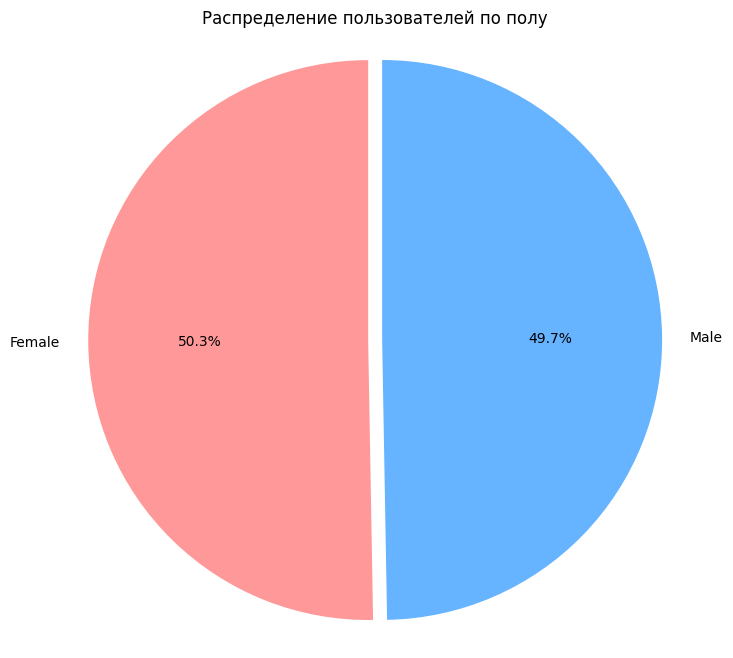

In [11]:


# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫—Ä—É–≥–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã –ø–æ –ø–æ–ª—É
plt.figure(figsize=(8, 8))
gender_counts = netflix_df['gender'].value_counts()
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff'],
        explode=(0.05, 0))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ –ø–æ–ª—É')
plt.axis('equal')
plt.show()

- –î–æ–ª—è –º—É–∂—á–∏–Ω: 50.3%, –¥–æ–ª—è –∂–µ–Ω—â–∏–Ω: 49.7%
- –ü—Ä–µ–æ–±–ª–∞–¥–∞—é—â–∞—è –∞—É–¥–∏—Ç–æ—Ä–∏—è: –º—É–∂—á–∏–Ω—ã
- –ì–µ–Ω–¥–µ—Ä–Ω—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å: –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ

4. –ò–∑—É—á–∏ –¥–µ–≤–∞–π—Å—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

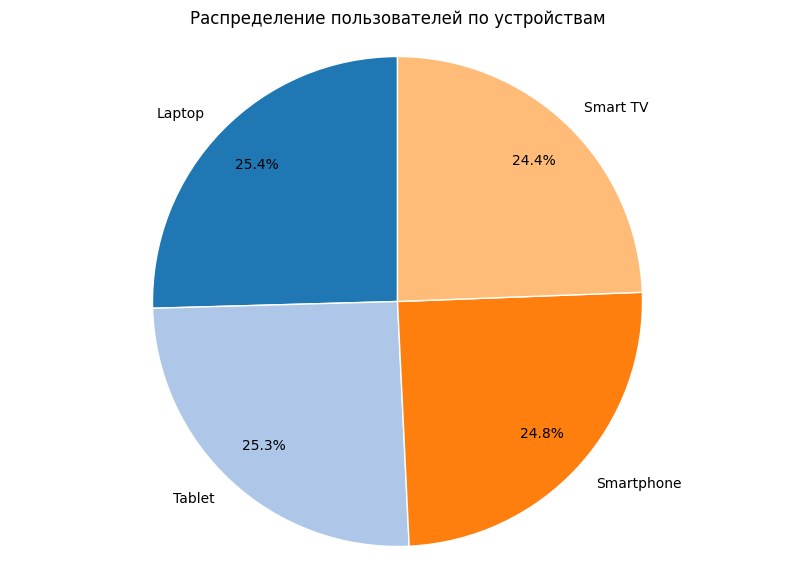

In [12]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫—Ä—É–≥–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã –ø–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞–º
plt.figure(figsize=(10, 7))
device_counts = netflix_df['device'].value_counts()
plt.pie(device_counts,
        labels=device_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors,
        pctdistance=0.8,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞–º')
plt.axis('equal')
plt.show()

1. –ù–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ: Laptop (25.4%)
2. –ù–∞–∏–º–µ–Ω–µ–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ–µ: Smart TV (24.4%)
- –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ–∂–¥—É –¥–µ–≤–∞–π—Å–∞–º–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ

5. –ò–∑—É—á–∏ —Ç–∏–ø –ø–æ–¥–ø–∏—Å–∫–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

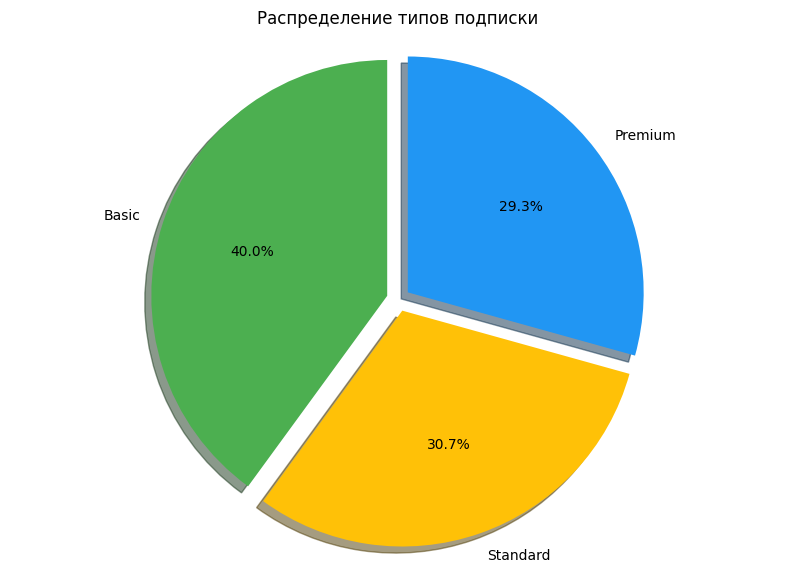

In [13]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫—Ä—É–≥–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã –ø–æ —Ç–∏–ø–∞–º –ø–æ–¥–ø–∏—Å–∫–∏
plt.figure(figsize=(10, 7))
subscription_counts = netflix_df['subscriptionType'].value_counts()
plt.pie(subscription_counts,
        labels=subscription_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50', '#FFC107', '#2196F3'],  # –ó–µ–ª–µ–Ω—ã–π, –∂–µ–ª—Ç—ã–π, —Å–∏–Ω–∏–π
        explode=[0.05]*len(subscription_counts),
        shadow=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –ø–æ–¥–ø–∏—Å–∫–∏')
plt.axis('equal')
plt.show()

1. –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —Ç–∞—Ä–∏—Ñ: Basic (40%)
2. –ù–∞–∏–º–µ–Ω–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–π: Premium (29.3%)
3. –°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Premium/Standard/Basic = 29.3% : 30.7% : 40%


6. –ò–∑—É—á–∏ –ª–æ–∫–∞—Ü–∏—é –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ —Å—Ç—Ä–∞–Ω–µ –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è

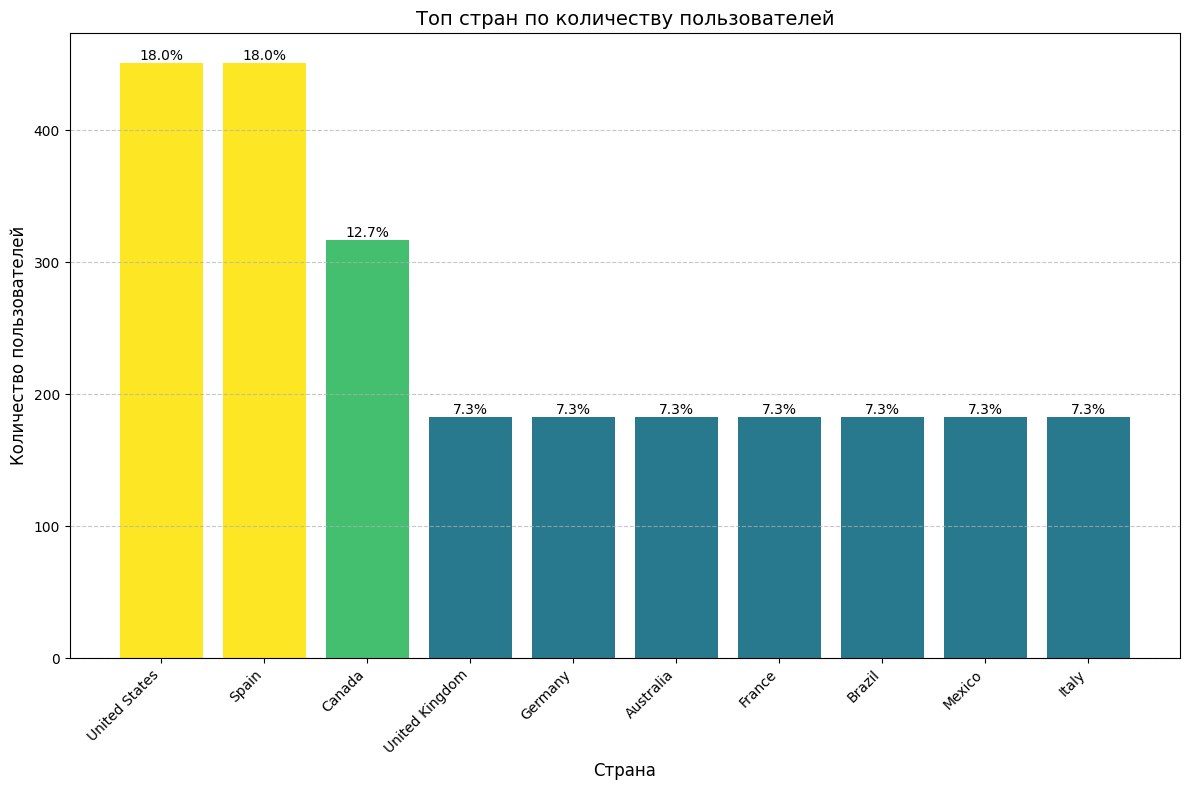

In [14]:


# –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ —Å—Ç—Ä–∞–Ω–∞–º –∏ —Å–æ—Ä—Ç–∏—Ä—É–µ–º
country_counts = netflix_df['country'].value_counts().sort_values(ascending=False)

# –§–∏–ª—å—Ç—Ä –¥–ª—è —Ç–æ–ø-N —Å—Ç—Ä–∞–Ω (–Ω–∞—Å—Ç—Ä–æ–π—Ç–µ —á–∏—Å–ª–æ)
top_n = 10  # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ç–æ–ø-10 —Å—Ç—Ä–∞–Ω
top_countries = country_counts.head(top_n)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(12, 8))
bars = plt.bar(
    top_countries.index,
    top_countries.values,
    color=plt.cm.viridis(top_countries.values / top_countries.values.max())  # –ì—Ä–∞–¥–∏–µ–Ω—Ç —Ü–≤–µ—Ç–æ–≤
)

# –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç—ã –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
total_users = country_counts.sum()
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{height/total_users:.1%}',
        ha='center',
        va='bottom'
    )

plt.title('–¢–æ–ø —Å—Ç—Ä–∞–Ω –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π', fontsize=14)
plt.xlabel('–°—Ç—Ä–∞–Ω–∞', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

–ù–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–∑ –°–®–ê –∏ –ò—Å–ø–∞–Ω–∏–∏ –ø–æ 18%, —Ç–∞–∫ –∂–µ –≤ —Ç–æ–ø 3 –≤—Ö–æ–¥–∏—Ç –ö–∞–Ω–∞–¥–∞ 12%. –û—Å—Ç–∞–ª—å–Ω—ã–µ —Å—Ç—Ä–∞–Ω—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –ø–æ 7.3%

7. –ü–æ—Å—Ç—Ä–æ–π –ª–∏–Ω–µ–π–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ –¥–∏–Ω–∞–º–∏–∫–∏ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞–Ω–Ω—ã—Ö Join date. –ï—Å–ª–∏ –≥—Ä–∞—Ñ–∏–∫ –±—É–¥–µ—Ç —Å–ª–∏—à–∫–æ–º –º–µ–ª–∫–∏–º, —Å–≥—Ä—É–ø–ø–∏—Ä—É–π –¥–∞–Ω–Ω—ã–µ –ø–æ –º–µ—Å—è—Ü—É;

<ipython-input-15-b4c853a677a6>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users = netflix_df.set_index('joinDate').resample('M')['userId'].count()


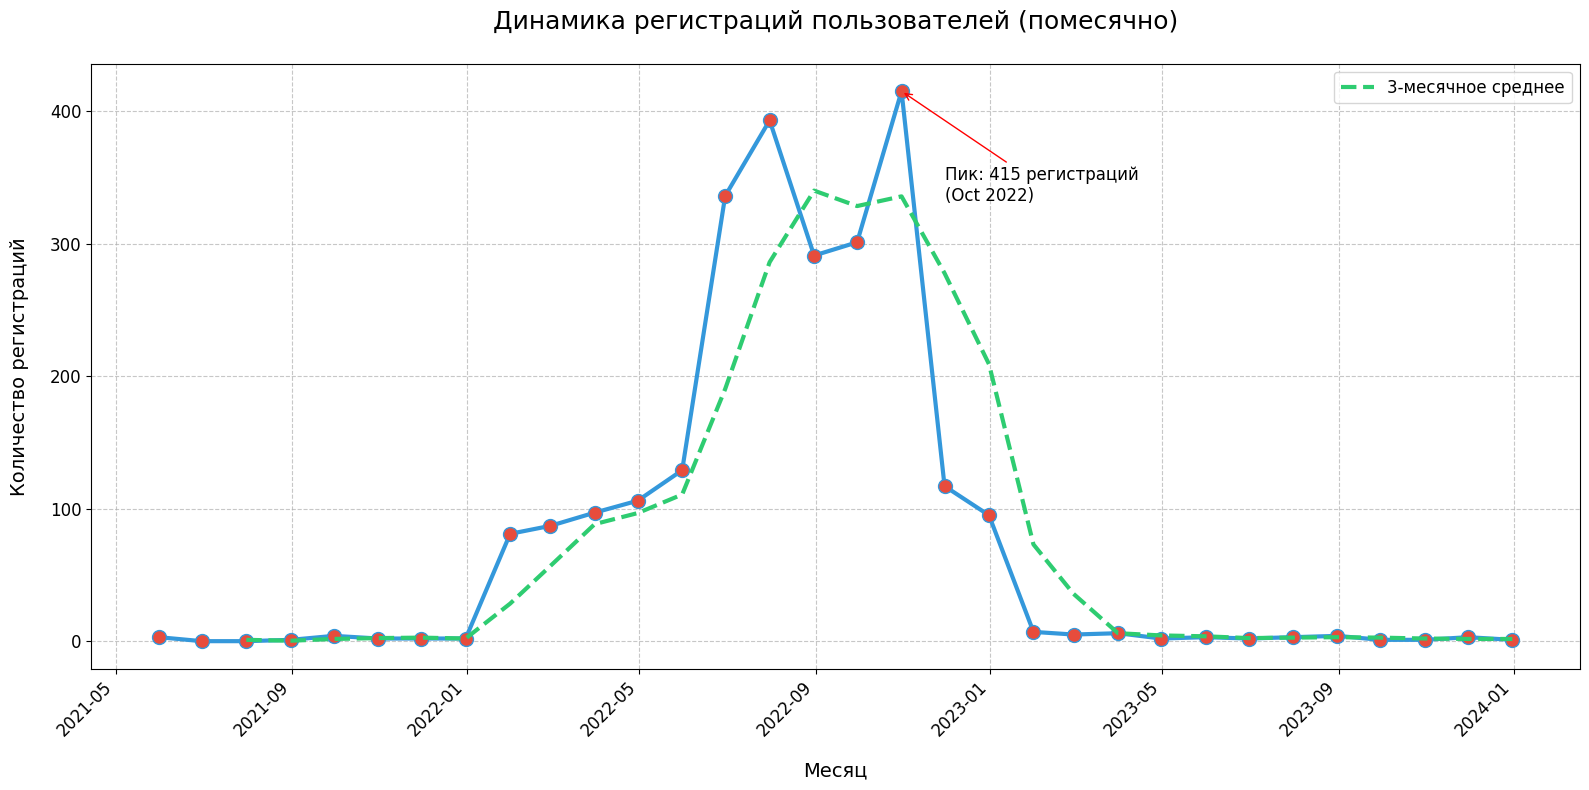

In [15]:

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ –º–µ—Å—è—Ü–∞–º —Å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –¥–∞—Ç
monthly_users = netflix_df.set_index('joinDate').resample('M')['userId'].count()

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Å —É–ª—É—á—à–µ–Ω–Ω—ã–º –¥–∏–∑–∞–π–Ω–æ–º
plt.figure(figsize=(16, 8))
plt.plot(monthly_users.index, monthly_users.values,
         marker='o',
         linestyle='-',
         color='#3498db',
         linewidth=3,
         markersize=10,
         markerfacecolor='#e74c3c')

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ
rolling_mean = monthly_users.rolling(window=3).mean()
plt.plot(rolling_mean.index, rolling_mean.values,
         label='3-–º–µ—Å—è—á–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ',
         linestyle='--',
         color='#2ecc71',
         linewidth=3)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
plt.title('–î–∏–Ω–∞–º–∏–∫–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (–ø–æ–º–µ—Å—è—á–Ω–æ)', fontsize=18, pad=25)
plt.xlabel('–ú–µ—Å—è—Ü', fontsize=14, labelpad=15)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# –ü–æ–¥–ø–∏—Å–∏ –¥–ª—è —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
max_month = monthly_users.idxmax().strftime('%b %Y')
min_month = monthly_users.idxmin().strftime('%b %Y')
plt.annotate(f'–ü–∏–∫: {monthly_users.max()} —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π\n({max_month})',
             xy=(monthly_users.idxmax(), monthly_users.max()),
             xytext=(monthly_users.idxmax() + pd.DateOffset(months=1), monthly_users.max()*0.8),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from scipy.stats import linregress
import numpy as np
import calendar

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö —Å —É—á–µ—Ç–æ–º –Ω–æ–≤–æ–≥–æ —Å–∏–Ω—Ç–∞–∫—Å–∏—Å–∞
monthly_users = netflix_df.set_index('joinDate').resample('ME')['userId'].count()

# –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑
def generate_insights(series):
    insights = []

    # 1. –û–±—â–∏–π —Ç—Ä–µ–Ω–¥
    x = np.arange(len(series))
    slope, _, _, _, _ = linregress(x, series.values)
    trend = "—Ä–æ—Å—Ç" if slope > 0 else "–ø–∞–¥–µ–Ω–∏–µ" if slope < 0 else "—Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å"
    insights.append(f"üìà –û–±—â–∏–π —Ç—Ä–µ–Ω–¥: {trend} ({slope:.1f} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π/–º–µ—Å—è—Ü)")

    # 2. –ü–∏–∫–∏ –∏ —Å–ø–∞–¥—ã
    max_month = series.idxmax().strftime('%b %Y')
    min_month = series.idxmin().strftime('%b %Y')
    insights.append(f"üî∫ –ü–∏–∫ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π: {series.max()} –≤ {max_month}")
    insights.append(f"üîª –ú–∏–Ω–∏–º—É–º —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π: {series.min()} –≤ {min_month}")

    # 3. –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–∞–Ω–∞–ª–∏–∑ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 2 –ª–µ—Ç)
    if len(series) >= 24:
        monthly_avg = series.groupby(series.index.month).mean()
        month_names = {i: calendar.month_name[i] for i in range(1, 13)}  # –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –æ—à–∏–±–∫–∏

        top_season = month_names[monthly_avg.idxmax()]
        bottom_season = month_names[monthly_avg.idxmin()]
        insights.append(f"üéÑ –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å: –ø–∏–∫–∏ –≤ {top_season}, —Å–ø–∞–¥—ã –≤ {bottom_season}")

    # 4. –ü–æ—Å–ª–µ–¥–Ω–∏–µ 3 –º–µ—Å—è—Ü–∞
    last_3 = series[-3:]
    change_last_month = ((last_3[-1] - last_3[-2])/last_3[-2]*100).round(1)
    insights.append(f"üïí –ü–æ—Å–ª–µ–¥–Ω–∏–µ 3 –º–µ—Å—è—Ü–∞: {', '.join(map(str, last_3.values))}")
    insights.append(f"üìÖ –ò–∑–º–µ–Ω–µ–Ω–∏–µ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü: {change_last_month}%")

    return '\n'.join(insights)

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∏ –≤—ã–≤–æ–¥ –∞–Ω–∞–ª–∏—Ç–∏–∫–∏
print("üîç –ê–Ω–∞–ª–∏—Ç–∏–∫–∞ –¥–∏–Ω–∞–º–∏–∫–∏ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π:")
print(generate_insights(monthly_users))

üîç –ê–Ω–∞–ª–∏—Ç–∏–∫–∞ –¥–∏–Ω–∞–º–∏–∫–∏ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π:
üìà –û–±—â–∏–π —Ç—Ä–µ–Ω–¥: –ø–∞–¥–µ–Ω–∏–µ (-1.0 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π/–º–µ—Å—è—Ü)
üî∫ –ü–∏–∫ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π: 415 –≤ Oct 2022
üîª –ú–∏–Ω–∏–º—É–º —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π: 0 –≤ Jun 2021
üéÑ –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å: –ø–∏–∫–∏ –≤ October, —Å–ø–∞–¥—ã –≤ December
üïí –ü–æ—Å–ª–µ–¥–Ω–∏–µ 3 –º–µ—Å—è—Ü–∞: 1, 3, 1
üìÖ –ò–∑–º–µ–Ω–µ–Ω–∏–µ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü: -66.7%


<ipython-input-16-224b23233e71>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  change_last_month = ((last_3[-1] - last_3[-2])/last_3[-2]*100).round(1)


8. –†–∞–∑–¥–µ–ª–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ –∫–æ—Ä–∑–∏–Ω—ã –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É –∏ –æ–ø—Ä–µ–¥–µ–ª–∏ —Å–∞–º—É—é –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω—É—é –≥—Ä—É–ø–ø—É;

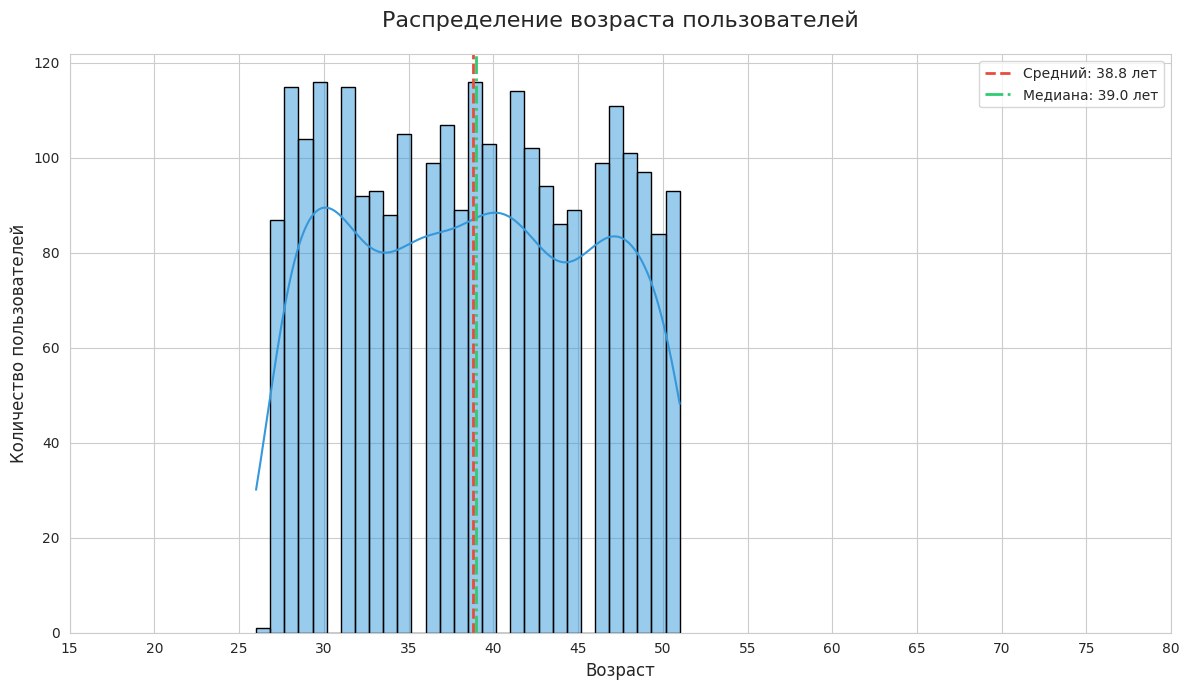

üìä –û—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:
- –°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç: 38.8 –ª–µ—Ç
- –ú–µ–¥–∏–∞–Ω–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç: 39.0 –ª–µ—Ç
- –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç: 26 –ª–µ—Ç
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç: 51 –ª–µ—Ç
- –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 7.2 –ª–µ—Ç


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª—è
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
ax = sns.histplot(netflix_df['age'],
                 bins=30,
                 color='#3498db',
                 edgecolor='black',
                 kde=True)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫
mean_age = netflix_df['age'].mean()
median_age = netflix_df['age'].median()

# –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
plt.axvline(mean_age, color='#e74c3c', linestyle='--', linewidth=2, label=f'–°—Ä–µ–¥–Ω–∏–π: {mean_age:.1f} –ª–µ—Ç')
plt.axvline(median_age, color='#2ecc71', linestyle='-.', linewidth=2, label=f'–ú–µ–¥–∏–∞–Ω–∞: {median_age:.1f} –ª–µ—Ç')

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π', fontsize=16, pad=20)
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π', fontsize=12)
plt.legend()
plt.xticks(range(0, 101, 5))
plt.xlim(15, 80)
plt.tight_layout()
plt.show()

# –í—ã–≤–æ–¥ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫
print(f'''üìä –û—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:
- –°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç: {mean_age:.1f} –ª–µ—Ç
- –ú–µ–¥–∏–∞–Ω–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç: {median_age:.1f} –ª–µ—Ç
- –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç: {netflix_df["age"].min()} –ª–µ—Ç
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç: {netflix_df["age"].max()} –ª–µ—Ç
- –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {netflix_df["age"].std():.1f} –ª–µ—Ç''')

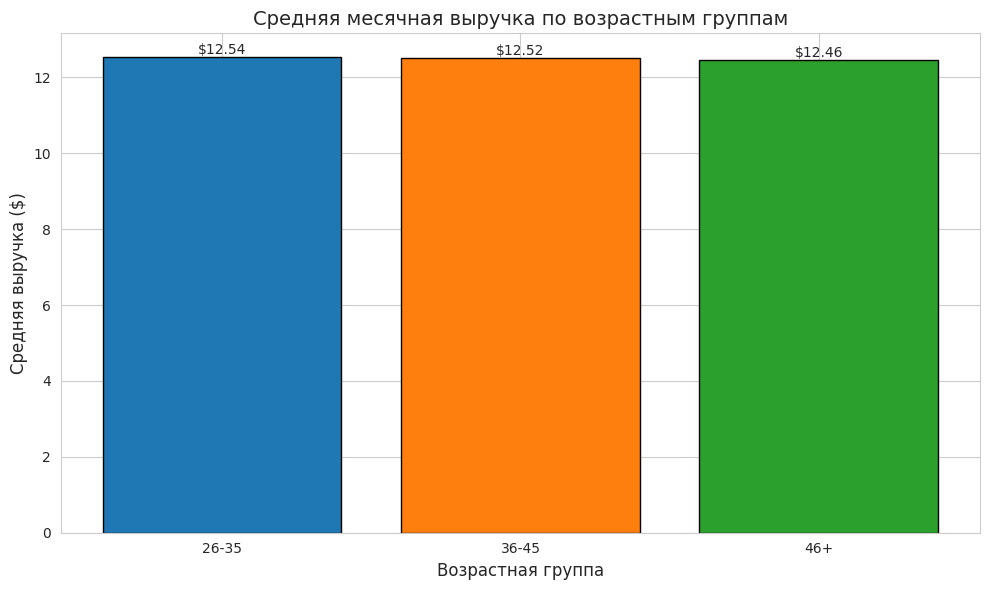

üìä –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞:
--------------------------------------------------
| –í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞ | –°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ | –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ |
--------------------------------------------------
|       26-35       | $        12.54 |        811 |
--------------------------------------------------

üîç –û—Å–Ω–æ–≤–Ω—ã–µ –≤—ã–≤–æ–¥—ã:
1. –ù–∞–∏–±–æ–ª–µ–µ –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–∞—è –≥—Ä—É–ø–ø–∞: 26-35 –ª–µ—Ç
2. –°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ —ç—Ç–æ–π –≥—Ä—É–ø–ø—ã –Ω–∞ 0.3% –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ
3. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π:
   - 26-35 –ª–µ—Ç: 811 —á–µ–ª.
   - 36-45 –ª–µ—Ç: 1015 —á–µ–ª.
   - 46+ –ª–µ—Ç:    674 —á–µ–ª.

üí° –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
- –î–ª—è –≥—Ä—É–ø–ø—ã 26-35 –ª–µ—Ç:
  * –í–Ω–µ–¥—Ä–∏—Ç—å –ø—Ä–µ–º–∏–∞–ª—å–Ω—ã–µ —Ç–∞—Ä–∏—Ñ—ã
  * –ü—Ä–µ–¥–ª–æ–∂–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Å–µ—Ä–≤–∏—Å—ã
- –î–ª—è –º–ª–∞–¥—à–∏—Ö –≥—Ä—É–ø–ø:
  * –†–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç–

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# –°–æ–∑–¥–∞–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –∫–æ—Ä–∑–∏–Ω –ø–æ –∑–∞–¥–∞–Ω–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º
bins = [25, 35, 45, netflix_df['age'].max() + 1]
labels = ['26-35', '36-45', '46+']
netflix_df['age_group'] = pd.cut(netflix_df['age'], bins=bins, labels=labels, right=False)

# –ê–Ω–∞–ª–∏–∑ –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏
age_revenue = netflix_df.groupby('age_group', observed=True).agg(
    avg_revenue=('monthlyRevenue', 'mean'),
    median_revenue=('monthlyRevenue', 'median'),
    users_count=('userId', 'nunique')
).reset_index()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 6))
bars = plt.bar(age_revenue['age_group'].astype(str),
             age_revenue['avg_revenue'],
             color=['#1f77b4', '#ff7f0e', '#2ca02c'],
             edgecolor='black')

plt.title('–°—Ä–µ–¥–Ω—è—è –º–µ—Å—è—á–Ω–∞—è –≤—ã—Ä—É—á–∫–∞ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º', fontsize=14)
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞', fontsize=12)
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ ($)', fontsize=12)
plt.xticks(rotation=0)

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–∞–º–æ–π –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–æ–π –≥—Ä—É–ø–ø—ã
most_profitable = age_revenue.loc[age_revenue['avg_revenue'].idxmax()]

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print(f'''üìä –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞:
--------------------------------------------------
| –í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞ | –°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ | –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ |
--------------------------------------------------
| {most_profitable['age_group']:^17} | ${most_profitable['avg_revenue']:>13.2f} | {most_profitable['users_count']:>10} |
--------------------------------------------------

üîç –û—Å–Ω–æ–≤–Ω—ã–µ –≤—ã–≤–æ–¥—ã:
1. –ù–∞–∏–±–æ–ª–µ–µ –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–∞—è –≥—Ä—É–ø–ø–∞: {most_profitable['age_group']} –ª–µ—Ç
2. –°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ —ç—Ç–æ–π –≥—Ä—É–ø–ø—ã –Ω–∞ {(most_profitable['avg_revenue']/age_revenue['avg_revenue'].mean()-1)*100:.1f}% –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ
3. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π:
   - 26-35 –ª–µ—Ç: {age_revenue[age_revenue['age_group'] == '26-35']['users_count'].values[0]} —á–µ–ª.
   - 36-45 –ª–µ—Ç: {age_revenue[age_revenue['age_group'] == '36-45']['users_count'].values[0]} —á–µ–ª.
   - 46+ –ª–µ—Ç:    {age_revenue[age_revenue['age_group'] == '46+']['users_count'].values[0]} —á–µ–ª.

üí° –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
- –î–ª—è –≥—Ä—É–ø–ø—ã {most_profitable['age_group']} –ª–µ—Ç:
  * –í–Ω–µ–¥—Ä–∏—Ç—å –ø—Ä–µ–º–∏–∞–ª—å–Ω—ã–µ —Ç–∞—Ä–∏—Ñ—ã
  * –ü—Ä–µ–¥–ª–æ–∂–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Å–µ—Ä–≤–∏—Å—ã
- –î–ª—è –º–ª–∞–¥—à–∏—Ö –≥—Ä—É–ø–ø:
  * –†–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏
  * –£—Å–∏–ª–∏—Ç—å —Ç–∞—Ä–≥–µ—Ç–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Ä–µ–∫–ª–∞–º—É''')

9. –í—ã—è–≤–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ç–∏–ø–∞ —Ç–∞—Ä–∏—Ñ–∞ –æ—Ç –≥—Ä—É–ø–ø—ã –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è - –≤–æ–∑–º–æ–∂–Ω–æ, –≤ –∫–∞–∫–∏—Ö-—Ç–æ –≥—Ä—É–ø–ø–∞—Ö –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É –µ—Å—Ç—å –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ —Ç–∞—Ä–∏—Ñ—ã, –∏ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –∫–∞–∫–∞—è –∞—É–¥–∏—Ç–æ—Ä–∏—è –±–æ–ª–µ–µ –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–∞. –ü—Ä–∏ —ç—Ç–æ–º –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –∏–ª–∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫–∏, –∞–Ω–∞–ª–∏–∑–∏—Ä—É—è –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø—ã —Ä–∞–∑–±–∏–≤–∫—É –ø–æ–¥ Subscription Type. –î–∞–ª–µ–µ –≤—ã–¥–µ–ª–∏ –≥—Ä—É–ø–ø—ã, –≥–¥–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ, –¥–æ–ø—É—Å—Ç–∏–º, –ø—Ä–µ–º–∏—É–º-–ø–æ–¥–ø–∏—Å–∫–∏ –±—É–¥–µ—Ç –Ω–∞–∏–±–æ–ª—å—à–∏–º.

<Figure size 1200x700 with 0 Axes>

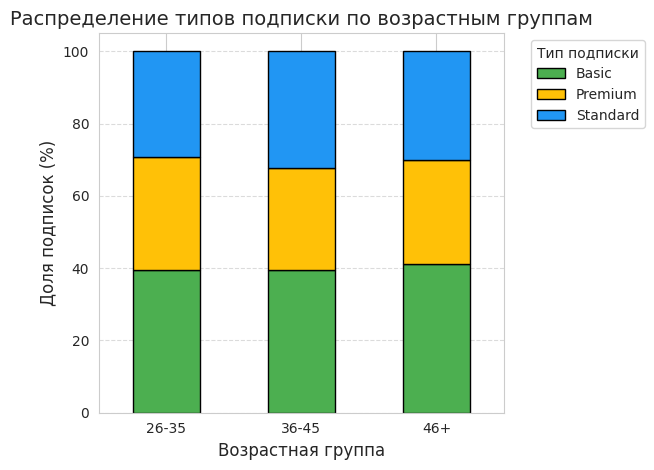


üìä –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞ –ø—Ä–µ–º–∏—É–º-–ø–æ–¥–ø–∏—Å–æ–∫:
+-------------+-----------+---------------+-----------------+
| age_group   |   Premium |   total_users |   premium_users |
+=============+===========+===============+=================+
| 26-35       |      31.2 |           811 |             253 |
+-------------+-----------+---------------+-----------------+
| 46+         |      28.8 |           674 |             194 |
+-------------+-----------+---------------+-----------------+
| 36-45       |      28.2 |          1015 |             286 |
+-------------+-----------+---------------+-----------------+

üîç –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å:
- p-value: 0.5395 (–Ω–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–∞ —É—Ä–æ–≤–Ω–µ 95%)
- Chi2: 3.11

üí° –ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã:
1. –ù–∞–∏–±–æ–ª—å—à–∞—è –¥–æ–ª—è Premium-–ø–æ–¥–ø–∏—Å–æ–∫: 26-35 (31.2%)
2. –ê–±—Å–æ–ª—é—Ç–Ω—ã–π –ª–∏–¥–µ—Ä –ø–æ Premium-–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º: 36-45 (286 —á–µ–ª.)
3. –í–æ–∑—Ä–∞—Å—Ç–Ω–∞

<ipython-input-24-f2f7972aeaa1>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_analysis['total_users'] = netflix_df.groupby('age_group')['userId'].nunique()
<ipython-input-24-f2f7972aeaa1>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_analysis['premium_users'] = netflix_df[netflix_df['subscriptionType'] == 'Premium'].groupby('age_group')['userId'].nunique()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. –°–æ–∑–¥–∞–Ω–∏–µ –∫—Ä–æ—Å—Å-—Ç–∞–±–ª–∏—Ü—ã
cross_tab = pd.crosstab(
    index=netflix_df['age_group'],
    columns=netflix_df['subscriptionType'],
    normalize='index'  # –ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –≤–Ω—É—Ç—Ä–∏ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø
).round(3) * 100

# 2. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
plt.figure(figsize=(12, 7))
cross_tab.plot(kind='bar',
               stacked=True,
               color=['#4CAF50', '#FFC107', '#2196F3'],
               edgecolor='black')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –ø–æ–¥–ø–∏—Å–∫–∏ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º', fontsize=14)
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞', fontsize=12)
plt.ylabel('–î–æ–ª—è –ø–æ–¥–ø–∏—Å–æ–∫ (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='–¢–∏–ø –ø–æ–¥–ø–∏—Å–∫–∏', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. –ê–Ω–∞–ª–∏–∑ –ø—Ä–µ–º–∏—É–º-–ø–æ–¥–ø–∏—Å–æ–∫
premium_analysis = cross_tab[['Premium']].sort_values('Premium', ascending=False)
premium_analysis['total_users'] = netflix_df.groupby('age_group')['userId'].nunique()
premium_analysis['premium_users'] = netflix_df[netflix_df['subscriptionType'] == 'Premium'].groupby('age_group')['userId'].nunique()

# 4. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç
chi2, p, dof, expected = chi2_contingency(pd.crosstab(netflix_df['age_group'], netflix_df['subscriptionType']))

# 5. –§–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –≤—ã–≤–æ–¥
print(f'''
üìä –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞ –ø—Ä–µ–º–∏—É–º-–ø–æ–¥–ø–∏—Å–æ–∫:
{premium_analysis.to_markdown(tablefmt="grid")}

üîç –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å:
- p-value: {p:.4f} ({"" if p < 0.05 else "–Ω–µ "}–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–∞ —É—Ä–æ–≤–Ω–µ 95%)
- Chi2: {chi2:.2f}

üí° –ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã:
1. –ù–∞–∏–±–æ–ª—å—à–∞—è –¥–æ–ª—è Premium-–ø–æ–¥–ø–∏—Å–æ–∫: {premium_analysis.index[0]} ({premium_analysis.iloc[0,0]}%)
2. –ê–±—Å–æ–ª—é—Ç–Ω—ã–π –ª–∏–¥–µ—Ä –ø–æ Premium-–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º: {premium_analysis['premium_users'].idxmax()} ({premium_analysis['premium_users'].max()} —á–µ–ª.)
3. –í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞ —Å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª–æ–º —Ä–æ—Å—Ç–∞: {premium_analysis.index[-1]} (—Ç–æ–ª—å–∫–æ {premium_analysis.iloc[-1,0]}% Premium)

üéØ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
- –î–ª—è –≥—Ä—É–ø–ø—ã {premium_analysis.index[0]}: —Ä–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å —ç–∫—Å–∫–ª—é–∑–∏–≤–Ω—ã–µ Premium-—É—Å–ª—É–≥–∏
- –î–ª—è –≥—Ä—É–ø–ø—ã {premium_analysis.index[-1]}: –∑–∞–ø—É—Å—Ç–∏—Ç—å —Ç–∞—Ä–≥–µ—Ç–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Ä–µ–∫–ª–∞–º—É Premium-—Ç–∞—Ä–∏—Ñ–æ–≤
- –ü—Ä–æ–≤–µ—Å—Ç–∏ A/B —Ç–µ—Å—Ç—ã —Ü–µ–Ω–æ–≤–æ–π –ø–æ–ª–∏—Ç–∏–∫–∏ –¥–ª—è –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø
''')

10. –ò–∑—É—á–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ç–∏–ø–∞ —Ç–∞—Ä–∏—Ñ–∞ –æ—Ç —Å—Ç—Ä–∞–Ω—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è - –∑–¥–µ—Å—å –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é, –∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é: –¥–∞–∂–µ –µ—Å–ª–∏ –Ω–∏–∫–∞–∫–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–µ—Ç, –≤ –ª—é–±–æ–º —Å–ª—É—á–∞–µ —Ç—ã —Å–º–æ–∂–µ—à—å —Å–¥–µ–ª–∞—Ç—å –∏ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫–∏–µ-—Ç–æ –≤—ã–≤–æ–¥—ã.

<Figure size 1600x1000 with 0 Axes>

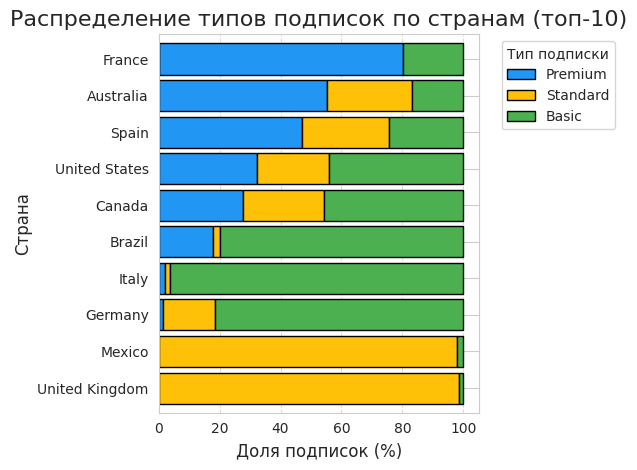


üìä –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ Premium-–ø–æ–¥–ø–∏—Å–∫–∞–º:
- –°—Ä–µ–¥–Ω—è—è –¥–æ–ª—è: 26.4%
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–æ–ª—è: 80.3% (France)
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–æ–ª—è: 0.0% 
- –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 27.6%

üîç –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç:
- p-value: 0.0000 (–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–∞ —É—Ä–æ–≤–Ω–µ 95%)
- –•–∏-–∫–≤–∞–¥—Ä–∞—Ç: 1683.9

üí° –ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã:
1. –õ–∏–¥–µ—Ä –ø–æ Premium-–ø–æ–¥–ø–∏—Å–∫–∞–º: France (80.3%)
2. –¢–æ–ø-3 —Å—Ç—Ä–∞–Ω: France (80.3%), Australia (55.2%), Spain (47.0%)
3. –†–∞–∑–±—Ä–æ—Å –º–µ–∂–¥—É –º–∞–∫—Å. –∏ –º–∏–Ω. –¥–æ–ª–µ–π: 80.3 –ø.–ø.

üéØ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
- –£—Å–∏–ª–∏—Ç—å –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏–µ Premium –≤ France (–≤—ã—Å–æ–∫–∏–π –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª)
- –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –ø—Ä–∏—á–∏–Ω—ã –Ω–∏–∑–∫–æ–π –¥–æ–ª–∏ Premium –≤ Mexico
- –î–ª—è —Å—Ç—Ä–∞–Ω —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º (27.6% std) - —Å–µ–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –∞—É–¥–∏—Ç–æ—Ä–∏—é



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö: —Ç–æ–ø-10 —Å—Ç—Ä–∞–Ω –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
top_countries = netflix_df['country'].value_counts().nlargest(10).index
filtered_df = netflix_df[netflix_df['country'].isin(top_countries)]

# 2. –°–æ–∑–¥–∞–Ω–∏–µ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–π –∫—Ä–æ—Å—Å-—Ç–∞–±–ª–∏—Ü—ã
cross_tab = pd.crosstab(
    index=filtered_df['country'],
    columns=filtered_df['subscriptionType'],
    normalize='index'
).round(3) * 100

# 3. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(16, 10))
colors = {'Basic': '#4CAF50', 'Standard': '#FFC107', 'Premium': '#2196F3'}
cross_tab.sort_values('Premium', ascending=False)[['Premium', 'Standard', 'Basic']].plot(
    kind='barh',
    stacked=True,
    color=[colors[c] for c in ['Premium', 'Standard', 'Basic']],
    edgecolor='black',
    width=0.85
)

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –ø–æ–¥–ø–∏—Å–æ–∫ –ø–æ —Å—Ç—Ä–∞–Ω–∞–º (—Ç–æ–ø-10)', fontsize=16)
plt.xlabel('–î–æ–ª—è –ø–æ–¥–ø–∏—Å–æ–∫ (%)', fontsize=12)
plt.ylabel('–°—Ç—Ä–∞–Ω–∞', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='–¢–∏–ø –ø–æ–¥–ø–∏—Å–∫–∏', bbox_to_anchor=(1.05, 1))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑
chi2, p, dof, expected = chi2_contingency(pd.crosstab(filtered_df['country'], filtered_df['subscriptionType']))

# 5. –ê–Ω–∞–ª–∏–∑ Premium-–ø–æ–¥–ø–∏—Å–æ–∫
premium_stats = cross_tab['Premium'].describe()
top_premium = cross_tab['Premium'].nlargest(3)

# 6. –§–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –≤—ã–≤–æ–¥
print(f'''
üìä –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ Premium-–ø–æ–¥–ø–∏—Å–∫–∞–º:
- –°—Ä–µ–¥–Ω—è—è –¥–æ–ª—è: {premium_stats["mean"]:.1f}%
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–æ–ª—è: {premium_stats["max"]:.1f}% ({top_premium.index[0]})
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–æ–ª—è: {premium_stats["min"]:.1f}%
- –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {premium_stats["std"]:.1f}%

üîç –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç:
- p-value: {p:.4f} ({"" if p < 0.05 else "–Ω–µ "}–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–∞ —É—Ä–æ–≤–Ω–µ 95%)
- –•–∏-–∫–≤–∞–¥—Ä–∞—Ç: {chi2:.1f}

üí° –ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã:
1. –õ–∏–¥–µ—Ä –ø–æ Premium-–ø–æ–¥–ø–∏—Å–∫–∞–º: {top_premium.index[0]} ({top_premium.iloc[0]:.1f}%)
2. –¢–æ–ø-3 —Å—Ç—Ä–∞–Ω: {", ".join([f"{c} ({v:.1f}%)" for c,v in top_premium.items()])}
3. –†–∞–∑–±—Ä–æ—Å –º–µ–∂–¥—É –º–∞–∫—Å. –∏ –º–∏–Ω. –¥–æ–ª–µ–π: {premium_stats["max"]-premium_stats["min"]:.1f} –ø.–ø.

üéØ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
- –£—Å–∏–ª–∏—Ç—å –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏–µ Premium –≤ {top_premium.index[0]} (–≤—ã—Å–æ–∫–∏–π –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª)
- –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –ø—Ä–∏—á–∏–Ω—ã –Ω–∏–∑–∫–æ–π –¥–æ–ª–∏ Premium –≤ {cross_tab['Premium'].idxmin()}
- –î–ª—è —Å—Ç—Ä–∞–Ω —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º ({cross_tab['Premium'].std():.1f}% std) - —Å–µ–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –∞—É–¥–∏—Ç–æ—Ä–∏—é
''')

#–ó–∞–∫–ª—é—á–∏—Ç–µ–ª—å–Ω—ã–π –≤—ã–≤–æ–¥:
## –û—Ö–≤–∞—Ç –∞–Ω–∞–ª–∏–∑–∞ —Å—Ç—Ä–∏–º–∏–Ω–≥ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã Netflix 2500 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, 10 —Å—Ç—Ä–∞–Ω, –ü–µ—Ä–∏–æ–¥ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏: —Å 2021-05-09 –ø–æ 2023-12-01, –≤–æ–∑—Ä–∞—Å—Ç –æ—Ç 26 –¥–æ 51 –≥–æ–¥–∞
## –ê–Ω–∞–ª–∏–∑ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É:
- 25-34 –≥–æ–¥–∞ 36.6%
- 35-44 –≥–æ–¥–∞ 40%
- —Å–≤—ã—à–µ 45 –ª–µ—Ç 23.4%
–ù–∞–∏–±–æ–ª—å—à–∞—è –¥–æ–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π 35-44 –≥–æ–¥–∞

## –ü–æ –ø–æ–ª—É:
- –º—É–∂—á–∏–Ω 50.3%
- –∂–µ–Ω—â–∏–Ω 49.7%

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ

## –ü–æ –¥–µ–≤–∞–π—Å–∞–º:
- –ù–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ: Laptop (25.4%)
- –ù–∞–∏–º–µ–Ω–µ–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ–µ: Smart TV (24.4%)

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ–∂–¥—É –¥–µ–≤–∞–π—Å–∞–º–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ

## –ü–æ —Ç–∏–ø—É –ø–æ–¥–ø–∏—Å–∫–∏:
- –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —Ç–∞—Ä–∏—Ñ: Basic (40%)
- –ù–∞–∏–º–µ–Ω–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–π: Premium (29.3%)

–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Premium/Standard/Basic = 29.3% : 30.7% : 40%

## –ü–æ –ª–æ–∫–∞—Ü–∏–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π:
–ù–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–∑ –°–®–ê –∏ –ò—Å–ø–∞–Ω–∏–∏ –ø–æ 18%, —Ç–∞–∫ –∂–µ –≤ —Ç–æ–ø 3 –≤—Ö–æ–¥–∏—Ç –ö–∞–Ω–∞–¥–∞ 12%. –û—Å—Ç–∞–ª—å–Ω—ã–µ —Å—Ç—Ä–∞–Ω—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –ø–æ 7.3%

## –ê–Ω–∞–ª–∏—Ç–∏–∫–∞ –¥–∏–Ω–∞–º–∏–∫–∏ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π:

üìà –û–±—â–∏–π —Ç—Ä–µ–Ω–¥: –ø–∞–¥–µ–Ω–∏–µ (-1.0 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π/–º–µ—Å—è—Ü)
- üî∫ –ü–∏–∫ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π: 415 –≤ Oct 2022
- üîª –ú–∏–Ω–∏–º—É–º —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π: 0 –≤ Jun 2021
- üéÑ –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å: –ø–∏–∫–∏ –≤ October, —Å–ø–∞–¥—ã –≤ December
- üìÖ –ò–∑–º–µ–Ω–µ–Ω–∏–µ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü: -66.7%

## –ê–Ω–∞–ª–∏–∑ –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º:
 –û—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:
- –°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç: 38.8 –ª–µ—Ç
- –ú–µ–¥–∏–∞–Ω–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç: 39.0 –ª–µ—Ç
- –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç: 26 –ª–µ—Ç
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç: 51 –ª–µ—Ç
- –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 7.2 –ª–µ—Ç

üîç –û—Å–Ω–æ–≤–Ω—ã–µ –≤—ã–≤–æ–¥—ã:
1. –ù–∞–∏–±–æ–ª–µ–µ –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω–∞—è –≥—Ä—É–ø–ø–∞: 26-35 –ª–µ—Ç
2. –°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ —ç—Ç–æ–π –≥—Ä—É–ø–ø—ã –Ω–∞ 0.3% –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ
3. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π:
   - 26-35 –ª–µ—Ç: 811 —á–µ–ª.
   - 36-45 –ª–µ—Ç: 1015 —á–µ–ª.
   - 46+ –ª–µ—Ç:    674 —á–µ–ª.

üí° –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
- –î–ª—è –≥—Ä—É–ø–ø—ã 26-35 –ª–µ—Ç:
  * –í–Ω–µ–¥—Ä–∏—Ç—å –ø—Ä–µ–º–∏–∞–ª—å–Ω—ã–µ —Ç–∞—Ä–∏—Ñ—ã
  * –ü—Ä–µ–¥–ª–æ–∂–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Å–µ—Ä–≤–∏—Å—ã
- –î–ª—è –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –≥—Ä—É–ø–ø:
  * –†–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏
  * –£—Å–∏–ª–∏—Ç—å —Ç–∞—Ä–≥–µ—Ç–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Ä–µ–∫–ª–∞–º—É

## –ê–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ç–∏–ø–∞ —Ç–∞—Ä–∏—Ñ–∞ –æ—Ç –≥—Ä—É–ø–ø—ã –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π:
- üîç –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å:
- p-value 0.5395 > 0.05 ‚Üí –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É —Ç–∏–ø–æ–º –ø–æ–¥–ø–∏—Å–∫–∏ –∏ –≤–æ–∑—Ä–∞—Å—Ç–æ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.
–≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –ø–æ–¥–ø–∏—Å–æ–∫ –º–µ–∂–¥—É  –º–æ–≥—É—Ç –±—ã—Ç—å —Å–ª—É—á–∞–π–Ω—ã–º–∏.
- –°–∏–ª–∞ —Å–≤—è–∑–∏ (Chi2):
–ù–∏–∑–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Chi2 3.11 –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –¥–∞–∂–µ –µ—Å–ª–∏ —Ä–∞–∑–ª–∏—á–∏—è –µ—Å—Ç—å, –æ–Ω–∏ —Å–ª–∞–±–æ –≤—ã—Ä–∞–∂–µ–Ω—ã.

üí° –ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã:
1. –ù–∞–∏–±–æ–ª—å—à–∞—è –¥–æ–ª—è Premium-–ø–æ–¥–ø–∏—Å–æ–∫: 26-35 (31.2%)
2. –ê–±—Å–æ–ª—é—Ç–Ω—ã–π –ª–∏–¥–µ—Ä –ø–æ Premium-–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º: 36-45 (286 —á–µ–ª.)
3. –í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞ —Å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª–æ–º —Ä–æ—Å—Ç–∞: 36-45 (—Ç–æ–ª—å–∫–æ 28.2% Premium)

üéØ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
- –î–ª—è –≥—Ä—É–ø–ø—ã 26-35: —Ä–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å —ç–∫—Å–∫–ª—é–∑–∏–≤–Ω—ã–µ Premium-—É—Å–ª—É–≥–∏
- –î–ª—è –≥—Ä—É–ø–ø—ã 36-45: –∑–∞–ø—É—Å—Ç–∏—Ç—å —Ç–∞—Ä–≥–µ—Ç–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Ä–µ–∫–ª–∞–º—É Premium-—Ç–∞—Ä–∏—Ñ–æ–≤
- –ü—Ä–æ–≤–µ—Å—Ç–∏ A/B —Ç–µ—Å—Ç—ã —Ü–µ–Ω–æ–≤–æ–π –ø–æ–ª–∏—Ç–∏–∫–∏ –¥–ª—è –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø

–ò—Ç–æ–≥: –ù–∞ —Ç–µ–∫—É—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –≤–æ–∑—Ä–∞—Å—Ç –Ω–µ–ª—å–∑—è —Å—á–∏—Ç–∞—Ç—å –∑–Ω–∞—á–∏–º—ã–º —Ñ–∞–∫—Ç–æ—Ä–æ–º –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Ç–∏–ø–∞ –ø–æ–¥–ø–∏—Å–∫–∏.

## –ê–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ç–∏–ø–æ–≤ —Ç–∞—Ä–∏—Ñ–∞ –æ—Ç —Å—Ç—Ä–∞–Ω—ã –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è:
 –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ Premium-–ø–æ–¥–ø–∏—Å–∫–∞–º:
- –°—Ä–µ–¥–Ω—è—è –¥–æ–ª—è: 26.4%
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–æ–ª—è: 80.3% (France)
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–æ–ª—è: 0.0%
- –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 27.6%

üîç –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç:
- p-value: 0.0000 (–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–∞ —É—Ä–æ–≤–Ω–µ 95%)
- –•–∏-–∫–≤–∞–¥—Ä–∞—Ç: 1683.9

üí° –ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã:
1. –õ–∏–¥–µ—Ä –ø–æ Premium-–ø–æ–¥–ø–∏—Å–∫–∞–º: France (80.3%)
2. –¢–æ–ø-3 —Å—Ç—Ä–∞–Ω: France (80.3%), Australia (55.2%), Spain (47.0%)
3. –†–∞–∑–±—Ä–æ—Å –º–µ–∂–¥—É –º–∞–∫—Å. –∏ –º–∏–Ω. –¥–æ–ª–µ–π: 80.3 –ø.–ø.

üéØ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
- –£—Å–∏–ª–∏—Ç—å –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏–µ Premium –≤ France (–≤—ã—Å–æ–∫–∏–π –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª)
- –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –ø—Ä–∏—á–∏–Ω—ã –Ω–∏–∑–∫–æ–π –¥–æ–ª–∏ Premium –≤ Mexico
- –î–ª—è —Å—Ç—Ä–∞–Ω —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º (27.6% std) - —Å–µ–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –∞—É–¥–∏—Ç–æ—Ä–∏—é

–ò—Ç–æ–≥: –û—á–µ–Ω—å —Å–∏–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ç–∏–ø–æ–≤ –ø–æ–¥–ø–∏—Å–∫–∏ –æ—Ç —Å—Ç—Ä–∞–Ω –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–ì–µ–æ–≥—Ä–∞—Ñ–∏—è –≤–ª–∏—è–µ—Ç –Ω–∞ –≤—ã–±–æ—Ä —Ç–∞—Ä–∏—Ñ–∞:
–í –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç—Ä–∞–Ω–∞—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —á–∞—â–µ –≤—ã–±–∏—Ä–∞—é—Ç Premium-–ø–æ–¥–ø–∏—Å–∫–∏, –≤ –¥—Ä—É–≥–∏—Ö ‚Äî Basic.

–ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏—á–∏–Ω—ã:
- –≠–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã (—É—Ä–æ–≤–µ–Ω—å –¥–æ—Ö–æ–¥–∞ –≤ —Å—Ç—Ä–∞–Ω–µ).
- –ö—É–ª—å—Ç—É—Ä–Ω—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ (–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –ø–æ–¥–ø–∏—Å–∫–∞–º).
- –õ–æ–∫–∞–ª–∏–∑–∞—Ü–∏—è –∫–æ–Ω—Ç–µ–Ω—Ç–∞ (–¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –ø—Ä–µ–º–∏—É–º-–∫–æ–Ω—Ç–µ–Ω—Ç–∞ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤).